# **WEEK 1 -  Project Initialization and Dataset Acquisition**

Had a good discussion with our mentor and kicked off the project!!

# **WEEK 2 -  Data Preprocessing and Feature Selection**

In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['axes.grid'] = True

RANDOM_STATE = 42

In [2]:
USE_UPLOAD = True

DAY_PATH = "day.csv"
HOUR_PATH = "hour.csv"

if USE_UPLOAD:
    try:
        from google.colab import files
        print("Upload day.csv")
        up1 = files.upload()
        DAY_PATH = list(up1.keys())[0]
        print("Upload hour.csv")
        up2 = files.upload()
        HOUR_PATH = list(up2.keys())[0]
    except Exception as e:
        print("Colab upload not available. Falling back to local paths.")

day = pd.read_csv(DAY_PATH)
hour = pd.read_csv(HOUR_PATH)

print("Day shape:", day.shape)
print("Hour shape:", hour.shape)
display(day.head(3))
display(hour.head(3))

Upload day.csv


Saving day.csv to day.csv
Upload hour.csv


Saving hour.csv to hour.csv
Day shape: (731, 16)
Hour shape: (17379, 17)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [3]:
def basic_clean(df):
    df = df.copy()
    # to datetime
    if 'dteday' in df.columns:
        df['dteday'] = pd.to_datetime(df['dteday'], errors='coerce')
    # dedupe
    before = len(df)
    df = df.drop_duplicates()
    after = len(df)
    print(f"Dropped duplicates: {before - after}")
    # range checks
    for col in ['temp','atemp','hum','windspeed']:
        if col in df.columns:
            print(col, "min/max:", df[col].min(), df[col].max())
    # missing
    print("Missing values per column:")
    print(df.isna().sum())
    return df

print("Daily dataset:")
day = basic_clean(day)
print("\nHourly dataset:")
hour = basic_clean(hour)

Daily dataset:
Dropped duplicates: 0
temp min/max: 0.0591304 0.861667
atemp min/max: 0.0790696 0.840896
hum min/max: 0.0 0.9725
windspeed min/max: 0.0223917 0.507463
Missing values per column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Hourly dataset:
Dropped duplicates: 0
temp min/max: 0.02 1.0
atemp min/max: 0.0 1.0
hum min/max: 0.0 1.0
windspeed min/max: 0.0 0.8507
Missing values per column:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


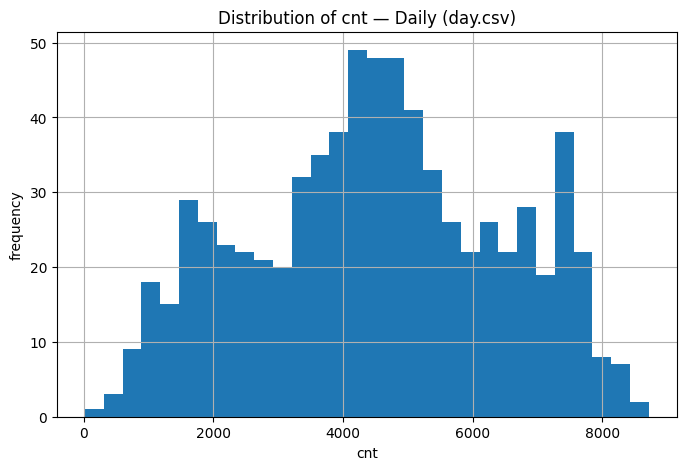

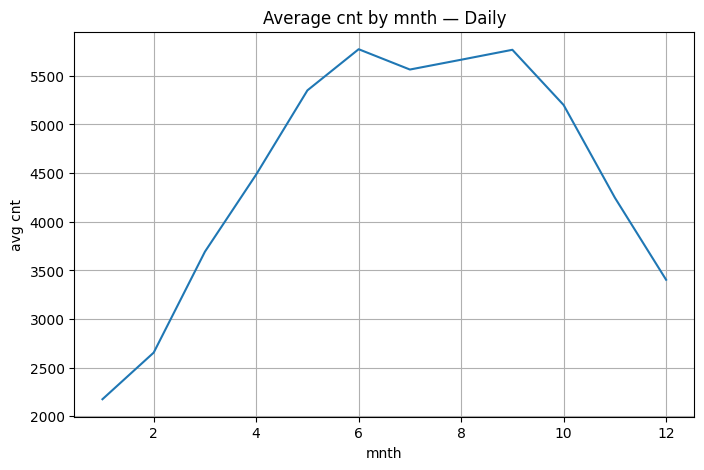

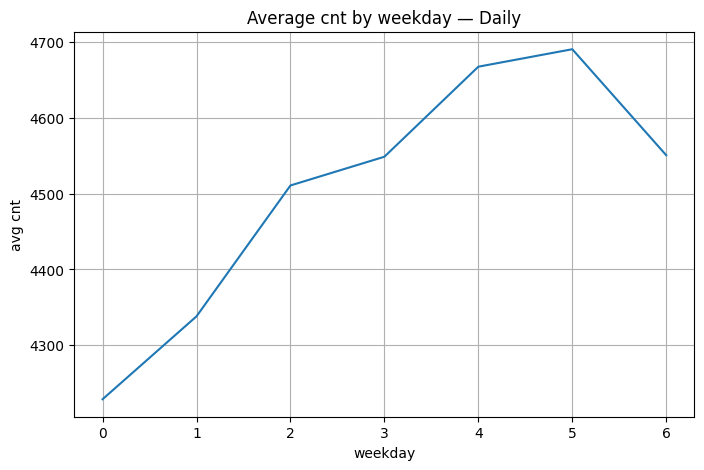

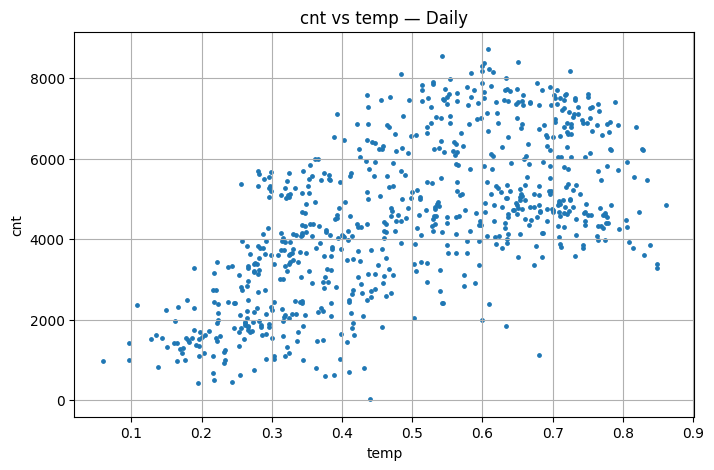

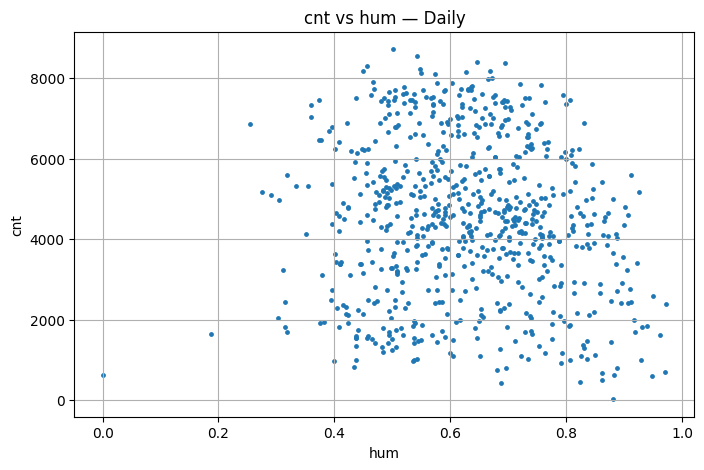

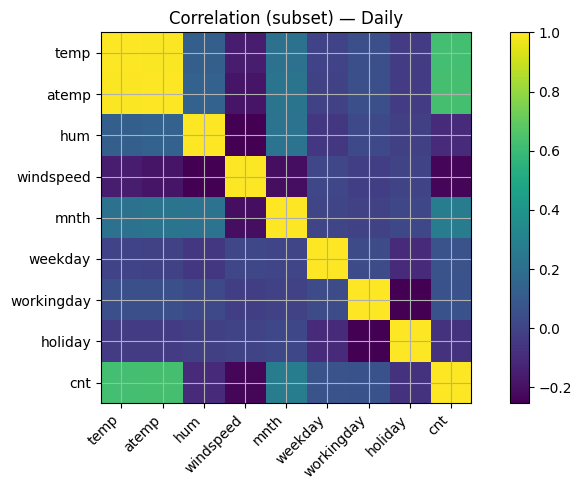

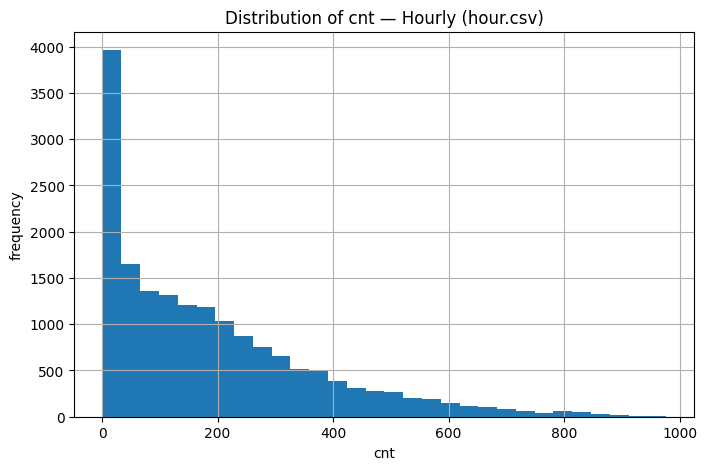

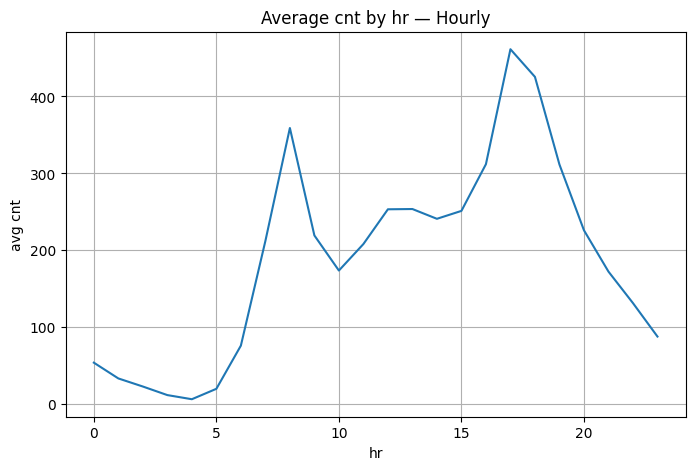

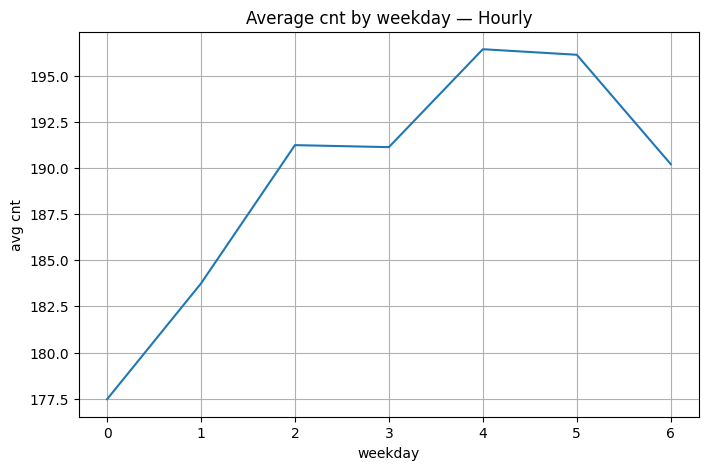

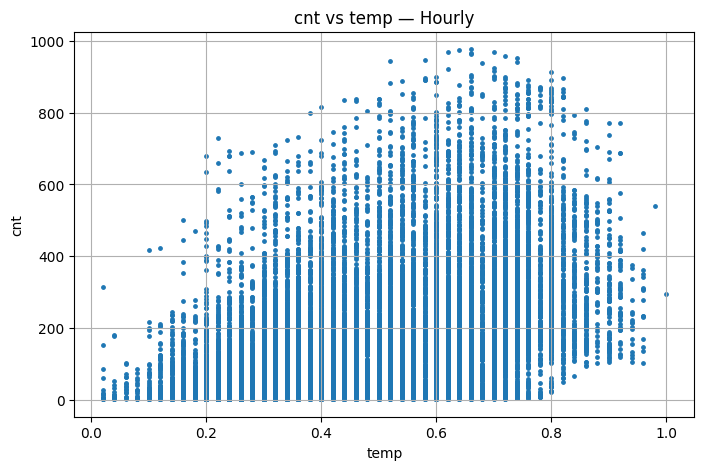

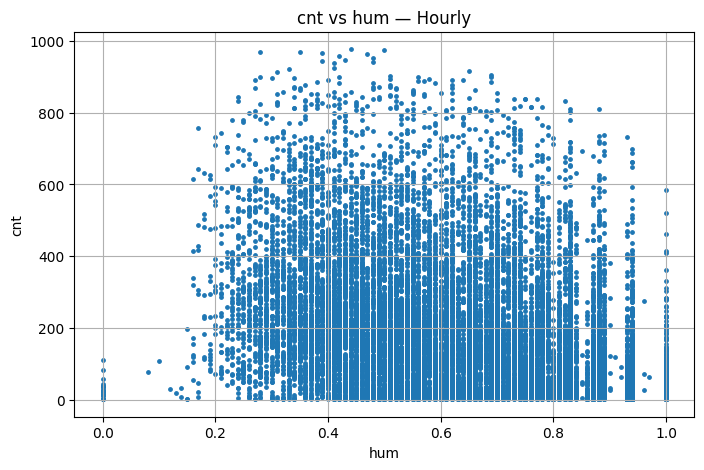

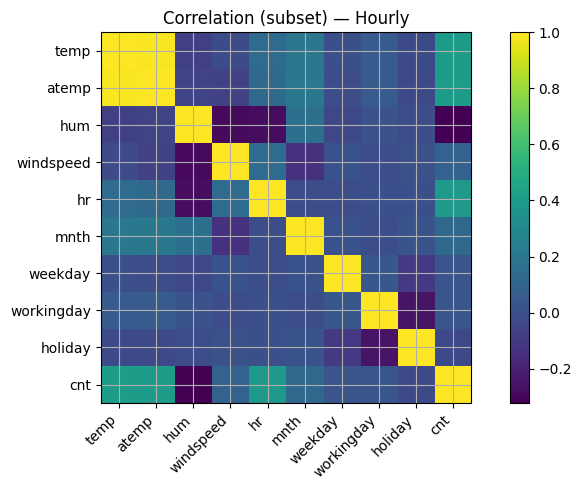

In [4]:

def plot_hist_cnt(df, title):
    plt.figure()
    plt.hist(df['cnt'], bins=30)
    plt.title(f"Distribution of cnt — {title}")
    plt.xlabel("cnt")
    plt.ylabel("frequency")
    plt.show()

def plot_avg_by(df, by_col, title):
    grp = df.groupby(by_col)['cnt'].mean()
    plt.figure()
    plt.plot(grp.index, grp.values)
    plt.title(f"Average cnt by {by_col} — {title}")
    plt.xlabel(by_col)
    plt.ylabel("avg cnt")
    plt.show()

def plot_scatter(df, x, y='cnt', title=''):
    plt.figure()
    plt.scatter(df[x], df[y], s=6)
    plt.title(f"{y} vs {x} — {title}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

def plot_corr(df, cols, title):
    cols = [c for c in cols if c in df.columns]
    c = df[cols].corr()
    plt.figure()
    im = plt.imshow(c, interpolation='nearest')
    plt.title(f"Correlation (subset) — {title}")
    plt.colorbar(im)
    plt.xticks(range(len(cols)), cols, rotation=45, ha='right')
    plt.yticks(range(len(cols)), cols)
    plt.tight_layout()
    plt.show()

# Daily EDA
plot_hist_cnt(day, "Daily (day.csv)")
plot_avg_by(day, 'mnth', "Daily")
plot_avg_by(day, 'weekday', "Daily")
plot_scatter(day, 'temp', 'cnt', "Daily")
plot_scatter(day, 'hum', 'cnt', "Daily")
plot_corr(day, ['temp','atemp','hum','windspeed','mnth','weekday','workingday','holiday','cnt'], "Daily")

# Hourly EDA
plot_hist_cnt(hour, "Hourly (hour.csv)")
plot_avg_by(hour, 'hr', "Hourly")
plot_avg_by(hour, 'weekday', "Hourly")
plot_scatter(hour, 'temp', 'cnt', "Hourly")
plot_scatter(hour, 'hum', 'cnt', "Hourly")
plot_corr(hour, ['temp','atemp','hum','windspeed','hr','mnth','weekday','workingday','holiday','cnt'], "Hourly")

In [5]:
def engineer_daily(df):
    df = df.copy()

    df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x in [0,6] else 0)

    df['month_sin'] = np.sin(2*np.pi*df['mnth']/12.0)
    df['month_cos'] = np.cos(2*np.pi*df['mnth']/12.0)

    df['wday_sin']  = np.sin(2*np.pi*df['weekday']/7.0)
    df['wday_cos']  = np.cos(2*np.pi*df['weekday']/7.0)
    return df

def engineer_hourly(df):
    df = df.copy()
    df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x in [0,6] else 0)
    df['rush_hour']  = df['hr'].apply(lambda x: 1 if x in [7,8,9,17,18,19] else 0)

    df['hour_sin'] = np.sin(2*np.pi*df['hr']/24.0)
    df['hour_cos'] = np.cos(2*np.pi*df['hr']/24.0)

    df['month_sin'] = np.sin(2*np.pi*df['mnth']/12.0)
    df['month_cos'] = np.cos(2*np.pi*df['mnth']/12.0)
    return df

day_fe  = engineer_daily(day)
hour_fe = engineer_hourly(hour)

display(day_fe.head(3))
display(hour_fe.head(3))


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,is_weekend,month_sin,month_cos,wday_sin,wday_cos
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.805833,0.160446,331,654,985,1,0.5,0.866025,-0.781831,0.62349
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0.696087,0.248539,131,670,801,1,0.5,0.866025,0.000000,1.00000
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,0.437273,0.248309,120,1229,1349,0,0.5,0.866025,0.781831,0.62349


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,windspeed,casual,registered,cnt,is_weekend,rush_hour,hour_sin,hour_cos,month_sin,month_cos
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.0,3,13,16,1,0,0.000000,1.000000,0.5,0.866025
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.0,8,32,40,1,0,0.258819,0.965926,0.5,0.866025
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.0,5,27,32,1,0,0.500000,0.866025,0.5,0.866025


# **WEEK 3 - Preliminary Model Training**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_hour = hour_fe.drop(columns=["instant","dteday","casual","registered","cnt"])
y_hour = hour_fe["cnt"]


X_train, X_test, y_train, y_test = train_test_split(
    X_hour, y_hour, test_size=0.2, random_state=42
)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


y_pred = lin_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Linear Regression model trained successfully on hourly dataset!")
print(f"Model R² Score on Test Data: {r2:.3f}")


Linear Regression model trained successfully on hourly dataset!
Model R² Score on Test Data: 0.643


In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np



def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"\n{name}")
    print(f"  R² Score : {r2:.3f}")
    print(f"  MAE      : {mae:.2f}")
    print(f"  RMSE     : {rmse:.2f}")
    return r2



models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}



results = {}
for name, model in models.items():
    results[name] = evaluate_model(name, model, X_train, y_train, X_test, y_test)



Linear Regression
  R² Score : 0.643
  MAE      : 79.85
  RMSE     : 106.39

Decision Tree
  R² Score : 0.889
  MAE      : 34.40
  RMSE     : 59.35

Random Forest
  R² Score : 0.945
  MAE      : 24.50
  RMSE     : 41.56

Gradient Boosting
  R² Score : 0.885
  MAE      : 41.25
  RMSE     : 60.22


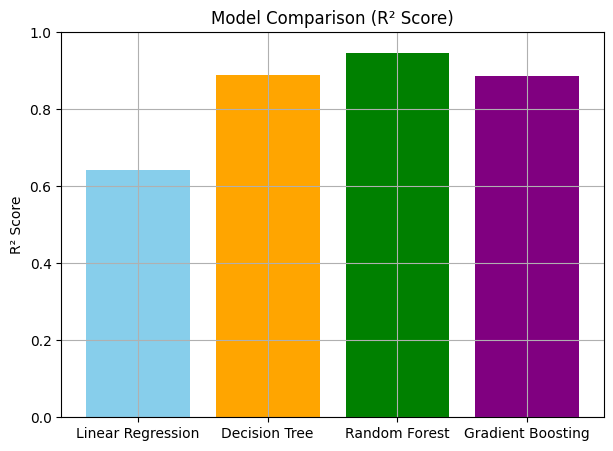

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.bar(results.keys(), results.values(), color=['skyblue','orange','green','purple'])
plt.title("Model Comparison (R² Score)")
plt.ylabel("R² Score")
plt.ylim(0,1)
plt.show()


# **WEEK 4 -  Predictions and Fine-tuning the Model**




   Actual  Predicted
0     425     382.86
1      88     115.05
2       4      11.39
3     526     544.62
4      13      14.28
5      32      34.88
6     706     757.65
7      26      35.03
8       2       9.63
9      21      26.11


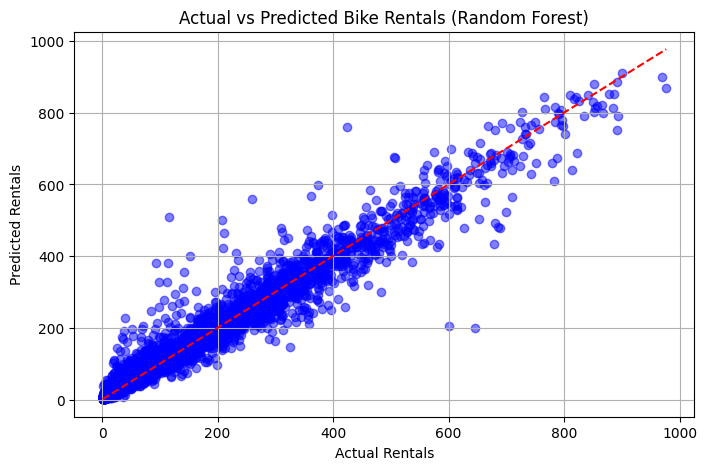

In [9]:
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)


results_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})


print(results_df.head(10))


plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.title("Actual vs Predicted Bike Rentals (Random Forest)")
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.show()


In [10]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}



rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)


grid_search.fit(X_train, y_train)


print("Best Parameters Found:", grid_search.best_params_)
print("Best R² Score from CV:", grid_search.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters Found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score from CV: 0.9408387258587307


Tuned Random Forest Performance on Test Data:
  R² Score : 0.945
  MAE      : 24.50
  RMSE     : 41.55


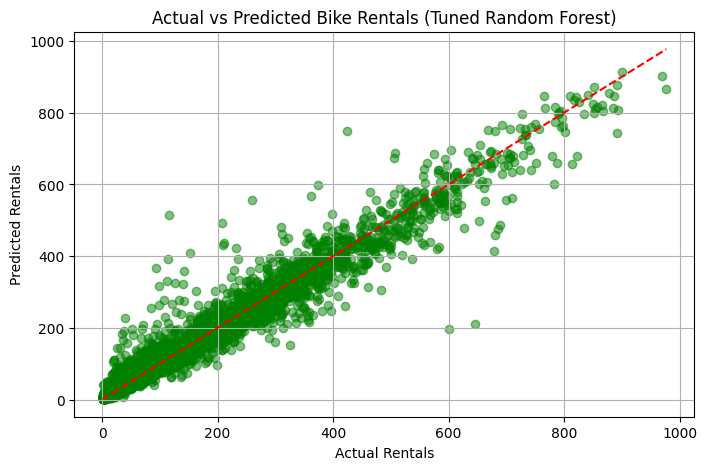

In [11]:
best_rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)


best_rf.fit(X_train, y_train)
y_pred_best = best_rf.predict(X_test)


mae = mean_absolute_error(y_test, y_pred_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)


print("Tuned Random Forest Performance on Test Data:")
print(f"  R² Score : {r2:.3f}")
print(f"  MAE      : {mae:.2f}")
print(f"  RMSE     : {rmse:.2f}")


plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_best, alpha=0.5, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.title("Actual vs Predicted Bike Rentals (Tuned Random Forest)")
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.show()


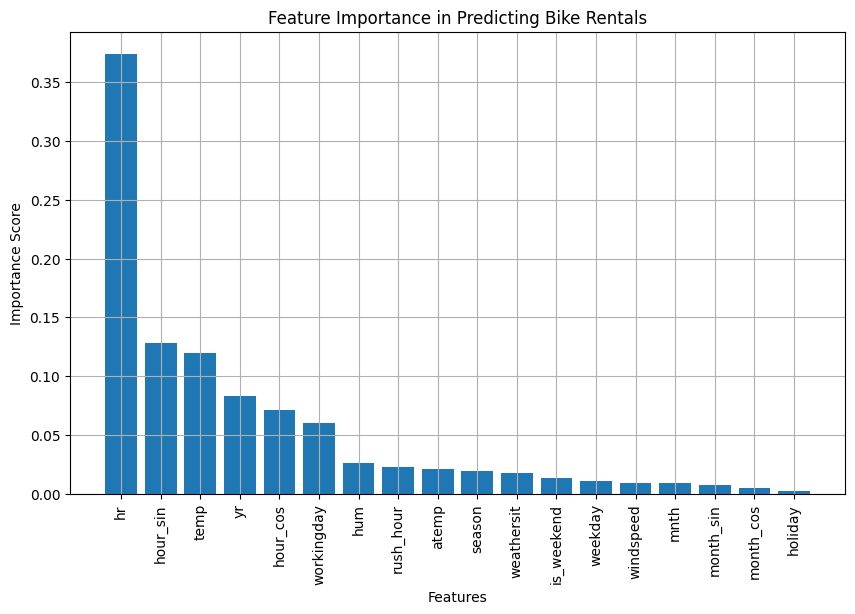

Top 5 most important features:
hr: 0.374
hour_sin: 0.128
temp: 0.120
yr: 0.083
hour_cos: 0.071


In [12]:
importances = best_rf.feature_importances_
features = X_train.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.title("Feature Importance in Predicting Bike Rentals")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

top_features = [(features[i], importances[i]) for i in indices[:5]]
print("Top 5 most important features:")
for f, score in top_features:
    print(f"{f}: {score:.3f}")


# **WEEK 5 - Refine Data and Experiment with Model Architectures**

In [13]:
import joblib

joblib.dump(best_rf, "tuned_random_forest.pkl")

print("Tuned Random Forest model saved successfully!")

Tuned Random Forest model saved successfully!


In [14]:
sample_input = pd.DataFrame([{
    "season": 2,
    "yr": 1,
    "mnth": 6,
    "hr": 17,
    "holiday": 0,
    "weekday": 4,
    "workingday": 1,
    "weathersit": 1,
    "temp": 0.5,
    "atemp": 0.48,
    "hum": 0.55,
    "windspeed": 0.2,
    "is_weekend": 0,
    "rush_hour": 1,
    "hour_sin": np.sin(2*np.pi*17/24),
    "hour_cos": np.cos(2*np.pi*17/24),
    "month_sin": np.sin(2*np.pi*6/12),
    "month_cos": np.cos(2*np.pi*6/12)
}])

predicted_rentals = best_rf.predict(sample_input)[0]
print(f"Predicted bike rentals for the sample input: {predicted_rentals:.0f}")


Predicted bike rentals for the sample input: 707


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

def preprocess_input(df):
    df = df.copy()

    df["is_weekend"] = df["weekday"].apply(lambda x: 1 if x in [0,6] else 0)

    df["rush_hour"] = df["hr"].apply(lambda x: 1 if x in [7,8,9,17,18,19] else 0)

    df["hour_sin"] = np.sin(2*np.pi*df["hr"]/24.0)
    df["hour_cos"] = np.cos(2*np.pi*df["hr"]/24.0)

    df["month_sin"] = np.sin(2*np.pi*df["mnth"]/12.0)
    df["month_cos"] = np.cos(2*np.pi*df["mnth"]/12.0)
    return df


preprocessor = FunctionTransformer(preprocess_input)


pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", best_rf)
])

In [16]:
test_cases = pd.DataFrame([
    {"season":2,"yr":1,"mnth":6,"hr":17,"holiday":0,"weekday":4,"workingday":1,
     "weathersit":1,"temp":0.5,"atemp":0.48,"hum":0.55,"windspeed":0.2},  # weekday rush hour
    {"season":2,"yr":1,"mnth":6,"hr":10,"holiday":0,"weekday":6,"workingday":0,
     "weathersit":2,"temp":0.4,"atemp":0.38,"hum":0.65,"windspeed":0.3},  # weekend morning, cloudy
    {"season":3,"yr":1,"mnth":9,"hr":21,"holiday":0,"weekday":2,"workingday":1,
     "weathersit":1,"temp":0.6,"atemp":0.58,"hum":0.45,"windspeed":0.15}, # weekday night, good weather
])

predictions = pipeline.predict(test_cases)
for i, pred in enumerate(predictions):
    print(f"Scenario {i+1} → Predicted rentals: {int(pred)}")


Scenario 1 → Predicted rentals: 707
Scenario 2 → Predicted rentals: 300
Scenario 3 → Predicted rentals: 272


In [17]:
joblib.dump(pipeline, "ridewise_pipeline.pkl")


loaded_pipeline = joblib.load("ridewise_pipeline.pkl")

print("Reloaded pipeline prediction:", int(loaded_pipeline.predict(test_cases.iloc[[0]])[0]))

Reloaded pipeline prediction: 707


# **WEEK 6 - Inference with Test Data**

In [18]:
import joblib

joblib.dump(pipeline, "ridewise_pipeline.pkl")

print("Pipeline saved as ridewise_pipeline.pkl")


Pipeline saved as ridewise_pipeline.pkl


In [19]:
!pip install pyngrok


In [20]:
from pyngrok import ngrok


In [21]:
!ngrok config add-authtoken 32s9cxX55YgwEWmGZYXEqqSHlzY_7EF9hVMYwQxe2ghjJoCnA


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [22]:
from pyngrok import ngrok

public_url = ngrok.connect(5000)
print("Public URL:", public_url)


Public URL: NgrokTunnel: "https://c75118c1ab81.ngrok-free.app" -> "http://localhost:5000"


In [23]:
!pip install flask pyngrok

from flask import Flask, request, jsonify
import pandas as pd
import joblib
from pyngrok import ngrok


pipeline = joblib.load("ridewise_pipeline.pkl")


app = Flask(__name__)

@app.route("/")
def home():
    return "RideWise Bike Prediction API is running on Colab!"

@app.route("/predict", methods=["POST"])
def predict():
    try:
        data = request.json
        df = pd.DataFrame([data])
        prediction = pipeline.predict(df)[0]
        return jsonify({"predicted_rentals": int(prediction)})
    except Exception as e:
        return jsonify({"error": str(e)})

public_url = ngrok.connect(5000)
print("Public URL:", public_url)

import threading
def run_flask():
    app.run(port=5000)

thread = threading.Thread(target=run_flask)
thread.start()



Public URL: NgrokTunnel: "https://688e7bc6b46f.ngrok-free.app" -> "http://localhost:5000"


In [26]:
import requests

url = "https://688e7bc6b46f.ngrok-free.app/predict"

sample_input = {
    "season": 2,
    "yr": 1,
    "mnth": 6,
    "hr": 17,
    "holiday": 0,
    "weekday": 4,
    "workingday": 1,
    "weathersit": 1,
    "temp": 0.5,
    "atemp": 0.48,
    "hum": 0.55,
    "windspeed": 0.2
}

response = requests.post(url, json=sample_input)

print("Status Code:", response.status_code)
print("Response JSON:", response.json())


INFO:werkzeug:127.0.0.1 - - [19/Sep/2025 14:11:04] "POST /predict HTTP/1.1" 200 -


Status Code: 200
Response JSON: {'predicted_rentals': 707}


# **WEEK 7 - FINALE**

Given a start, learning and building concepts and ideas and then will start the execution!!!